In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
df_in = pd.read_csv('Austin_Animal_Center_Intakes.csv')
df_in.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
1,A665739,*Alana,10/22/2013 11:11:00 AM,October 2013,Austin (TX),Stray,Normal,Cat,Intact Female,1 month,Domestic Medium Hair Mix,Black
2,A665763,NaN,10/22/2013 03:10:00 PM,October 2013,E Riverside Dr/Royal Crest Dr in Austin (TX),Stray,Normal,Dog,Intact Male,4 months,Cairn Terrier Mix,Tan/White
3,A379998,Disciple,10/23/2013 11:42:00 AM,October 2013,51St And Grover in Austin (TX),Stray,Normal,Dog,Intact Male,10 years,Pit Bull,Black
4,A634503,Otter,10/01/2013 02:49:00 PM,October 2013,Manor (TX),Owner Surrender,Normal,Dog,Spayed Female,2 years,Norfolk Terrier Mix,Tan


# Preparing the data

In [3]:
df_out = pd.read_csv('Austin_Animal_Center_Outcomes.csv')
df_out.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [4]:
# Join the intake data with the outcome data;
# include date and location it was found, intake type and condition,
# and whether it was neutered/spayed or not at intake

df_in1 = df_in[['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Found Location', 'Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake', 'Age upon Intake', 'Breed', 'Color']].rename(columns={'DateTime': 'Intake Time', 'MonthYear' : 'Intake MonthYear'})

df_out1 = df_out[['Outcome Type', 'DateTime', 'MonthYear', 'Outcome Subtype', 'Sex upon Outcome', 'Age upon Outcome']].rename(columns={'DateTime': 'Outcome Time', 'MonthYear': 'Outcome MonthYear'})

df_combined = pd.concat([df_in1, df_out1])


print(df_combined)

       Animal ID      Name             Intake Time Intake MonthYear  \
0        A665644       NaN  10/21/2013 07:59:00 AM     October 2013   
1        A665739    *Alana  10/22/2013 11:11:00 AM     October 2013   
2        A665763       NaN  10/22/2013 03:10:00 PM     October 2013   
3        A379998  Disciple  10/23/2013 11:42:00 AM     October 2013   
4        A634503     Otter  10/01/2013 02:49:00 PM     October 2013   
...          ...       ...                     ...              ...   
149506       NaN       NaN                     NaN              NaN   
149507       NaN       NaN                     NaN              NaN   
149508       NaN       NaN                     NaN              NaN   
149509       NaN       NaN                     NaN              NaN   
149510       NaN       NaN                     NaN              NaN   

                                      Found Location      Intake Type  \
0                                        Austin (TX)            Stray   
1

In [5]:
# TODO 2: find the unique type-subtype pairs. Right now it just shows them all
type_subtype_pairing = df_out[['Outcome Type', 'Outcome Subtype']]
outcome_type = df_out['Outcome Type']
outcome_subtype = df_out['Outcome Subtype']

unique_types = outcome_type.unique()
unique_subtypes = outcome_subtype.unique()

# Unique type-subtype pairings, such as 'Adoption' and 'Foster'
unique_pairings = []

print("Unique types of outcomes - ", unique_types.tolist())
print("Unique sub-types of outcomes - ", unique_subtypes.tolist())

total_cases = 0
for outcomeType in unique_types:
    outcome_count = len(type_subtype_pairing.loc[type_subtype_pairing['Outcome Type'] == outcomeType])
    total_cases += outcome_count
    print('Number of cases where the outcome is {} is {}'.format(outcomeType, outcome_count))

print('The total number of cases is', total_cases)

print('\n\nType-Subtype pairing -\n', type_subtype_pairing)

Unique types of outcomes -  ['Rto-Adopt', 'Adoption', 'Euthanasia', 'Transfer', 'Return to Owner', 'Died', 'Disposal', 'Missing', 'Relocate', nan, 'Stolen']
Unique sub-types of outcomes -  [nan, 'Partner', 'Foster', 'SCRP', 'Out State', 'Suffering', 'Underage', 'Snr', 'Rabies Risk', 'In Kennel', 'Offsite', 'Aggressive', 'Enroute', 'At Vet', 'In Foster', 'Field', 'Behavior', 'Medical', 'Possible Theft', 'Barn', 'Customer S', 'Court/Investigation', 'Emer', 'In Surgery', 'Prc', 'Emergency', 'In State']
Number of cases where the outcome is Rto-Adopt is 1003
Number of cases where the outcome is Adoption is 69764
Number of cases where the outcome is Euthanasia is 9667
Number of cases where the outcome is Transfer is 42941
Number of cases where the outcome is Return to Owner is 23930
Number of cases where the outcome is Died is 1399
Number of cases where the outcome is Disposal is 678
Number of cases where the outcome is Missing is 75
Number of cases where the outcome is Relocate is 26
Number

In [6]:
df_out = df_out.convert_dtypes(infer_objects=True)
df_out['DateTime'] = pd.to_datetime(df_out['DateTime'])
df_out['Date of Birth'] = pd.to_datetime(df_out['Date of Birth'])
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149511 entries, 0 to 149510
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         149511 non-null  string        
 1   Name              106260 non-null  string        
 2   DateTime          149511 non-null  datetime64[ns]
 3   MonthYear         149511 non-null  string        
 4   Date of Birth     149511 non-null  datetime64[ns]
 5   Outcome Type      149485 non-null  string        
 6   Outcome Subtype   68443 non-null   string        
 7   Animal Type       149511 non-null  string        
 8   Sex upon Outcome  149509 non-null  string        
 9   Age upon Outcome  149465 non-null  string        
 10  Breed             149511 non-null  string        
 11  Color             149511 non-null  string        
dtypes: datetime64[ns](2), string(10)
memory usage: 13.7 MB


## Name

In [7]:
# Set df_out['Name'] so that if it had an asterisk in front, the asterisk is removed

nameNA = df_out['Name'].isna()
print(len(nameNA), len(df_out['Name']))


df_out['Name'] = [name.replace('*', '') if nameNA[i] == False else name for i, name in enumerate(df_out['Name'])]

df_out.head()

149511 149511


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,<NA>,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,<NA>,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,<NA>,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,<NA>,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,<NA>,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,<NA>,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


## Colors

In [8]:
from math import pi

# colors.csv was compiled from these wikipedia articles
# https://en.wikipedia.org/wiki/List_of_colors:_A–F
# https://en.wikipedia.org/wiki/List_of_colors:_G%E2%80%93M
# https://en.wikipedia.org/wiki/List_of_colors:_N%E2%80%93Z
# Then the "—" character was replaced with "0"
df_colors = pd.read_csv('colors.csv')
df_colors = df_colors.convert_dtypes(infer_objects=True)
df_colors['Name'] = df_colors['Name'].str.lower()
df_colors['Red (RGB)'] = pd.to_numeric(df_colors['Red (RGB)'].str.replace('%', '')).div(100)
df_colors['Green (RGB)'] = pd.to_numeric(df_colors['Green (RGB)'].str.replace('%', '')).div(100)
df_colors['Blue (RGB)'] = pd.to_numeric(df_colors['Blue (RGB)'].str.replace('%', '')).div(100)
df_colors['Hue (HSL/HSV)'] = pd.to_numeric(df_colors['Hue (HSL/HSV)'].str.replace('°', '')).div(360)
df_colors['Satur. (HSL)'] = pd.to_numeric(df_colors['Satur. (HSL)'].str.replace('%', '')).div(100)
df_colors['Light (HSL)'] = pd.to_numeric(df_colors['Light (HSL)'].str.replace('%', '')).div(100)
df_colors['Satur. (HSV)'] = pd.to_numeric(df_colors['Satur. (HSV)'].str.replace('%', '')).div(100)
df_colors['Value (HSV)'] = pd.to_numeric(df_colors['Value (HSV)'].str.replace('%', '')).div(100)
df_colors.head()

,Name,Hex (RGB),Red (RGB),Green (RGB),Blue (RGB),Hue (HSL/HSV),Satur. (HSL),Light (HSL),Satur. (HSV),Value (HSV),Source
0,absolute zero,#0048BA,0.00,0.28,0.73,0.602778,1.00,0.37,1.00,0.73,Crayola
1,acid green,#B0BF1A,0.69,0.75,0.10,0.180556,0.76,0.43,0.76,0.43,Art Paints YG07S
2,aero,#7CB9E8,0.49,0.73,0.91,0.572222,0.70,0.70,0.47,0.91,Maerz and Paul
3,african violet,#B284BE,0.70,0.52,0.75,0.800000,0.31,0.63,0.31,0.75,Pantone
4,air superiority blue,#72A0C1,0.45,0.63,0.76,0.569444,0.39,0.60,0.41,0.76,Federal Standard 595


Since we will look for correlations with the color variables for the animals, we want to account for the fact that those color variables are drawn from this dataset, and so there could be a sampling bias in how the colors are interpreted.

Here, it looks like there is a weak correlation between red and green and between green and blue, but red and blue are mostly unrelated.

/var/folders/s1/blb__1hx63nfd689j6c_pc0m0000gn/T/ipykernel_94795/3282312412.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_colors.corr(), annot=True)


<Axes: >

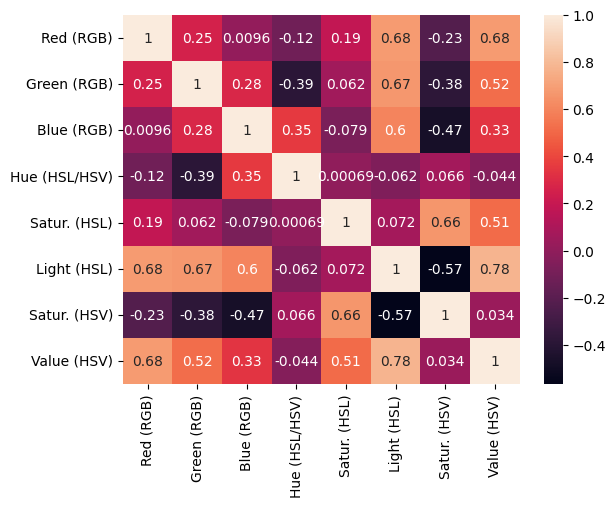

In [9]:
sns.heatmap(data=df_colors.corr(), annot=True)

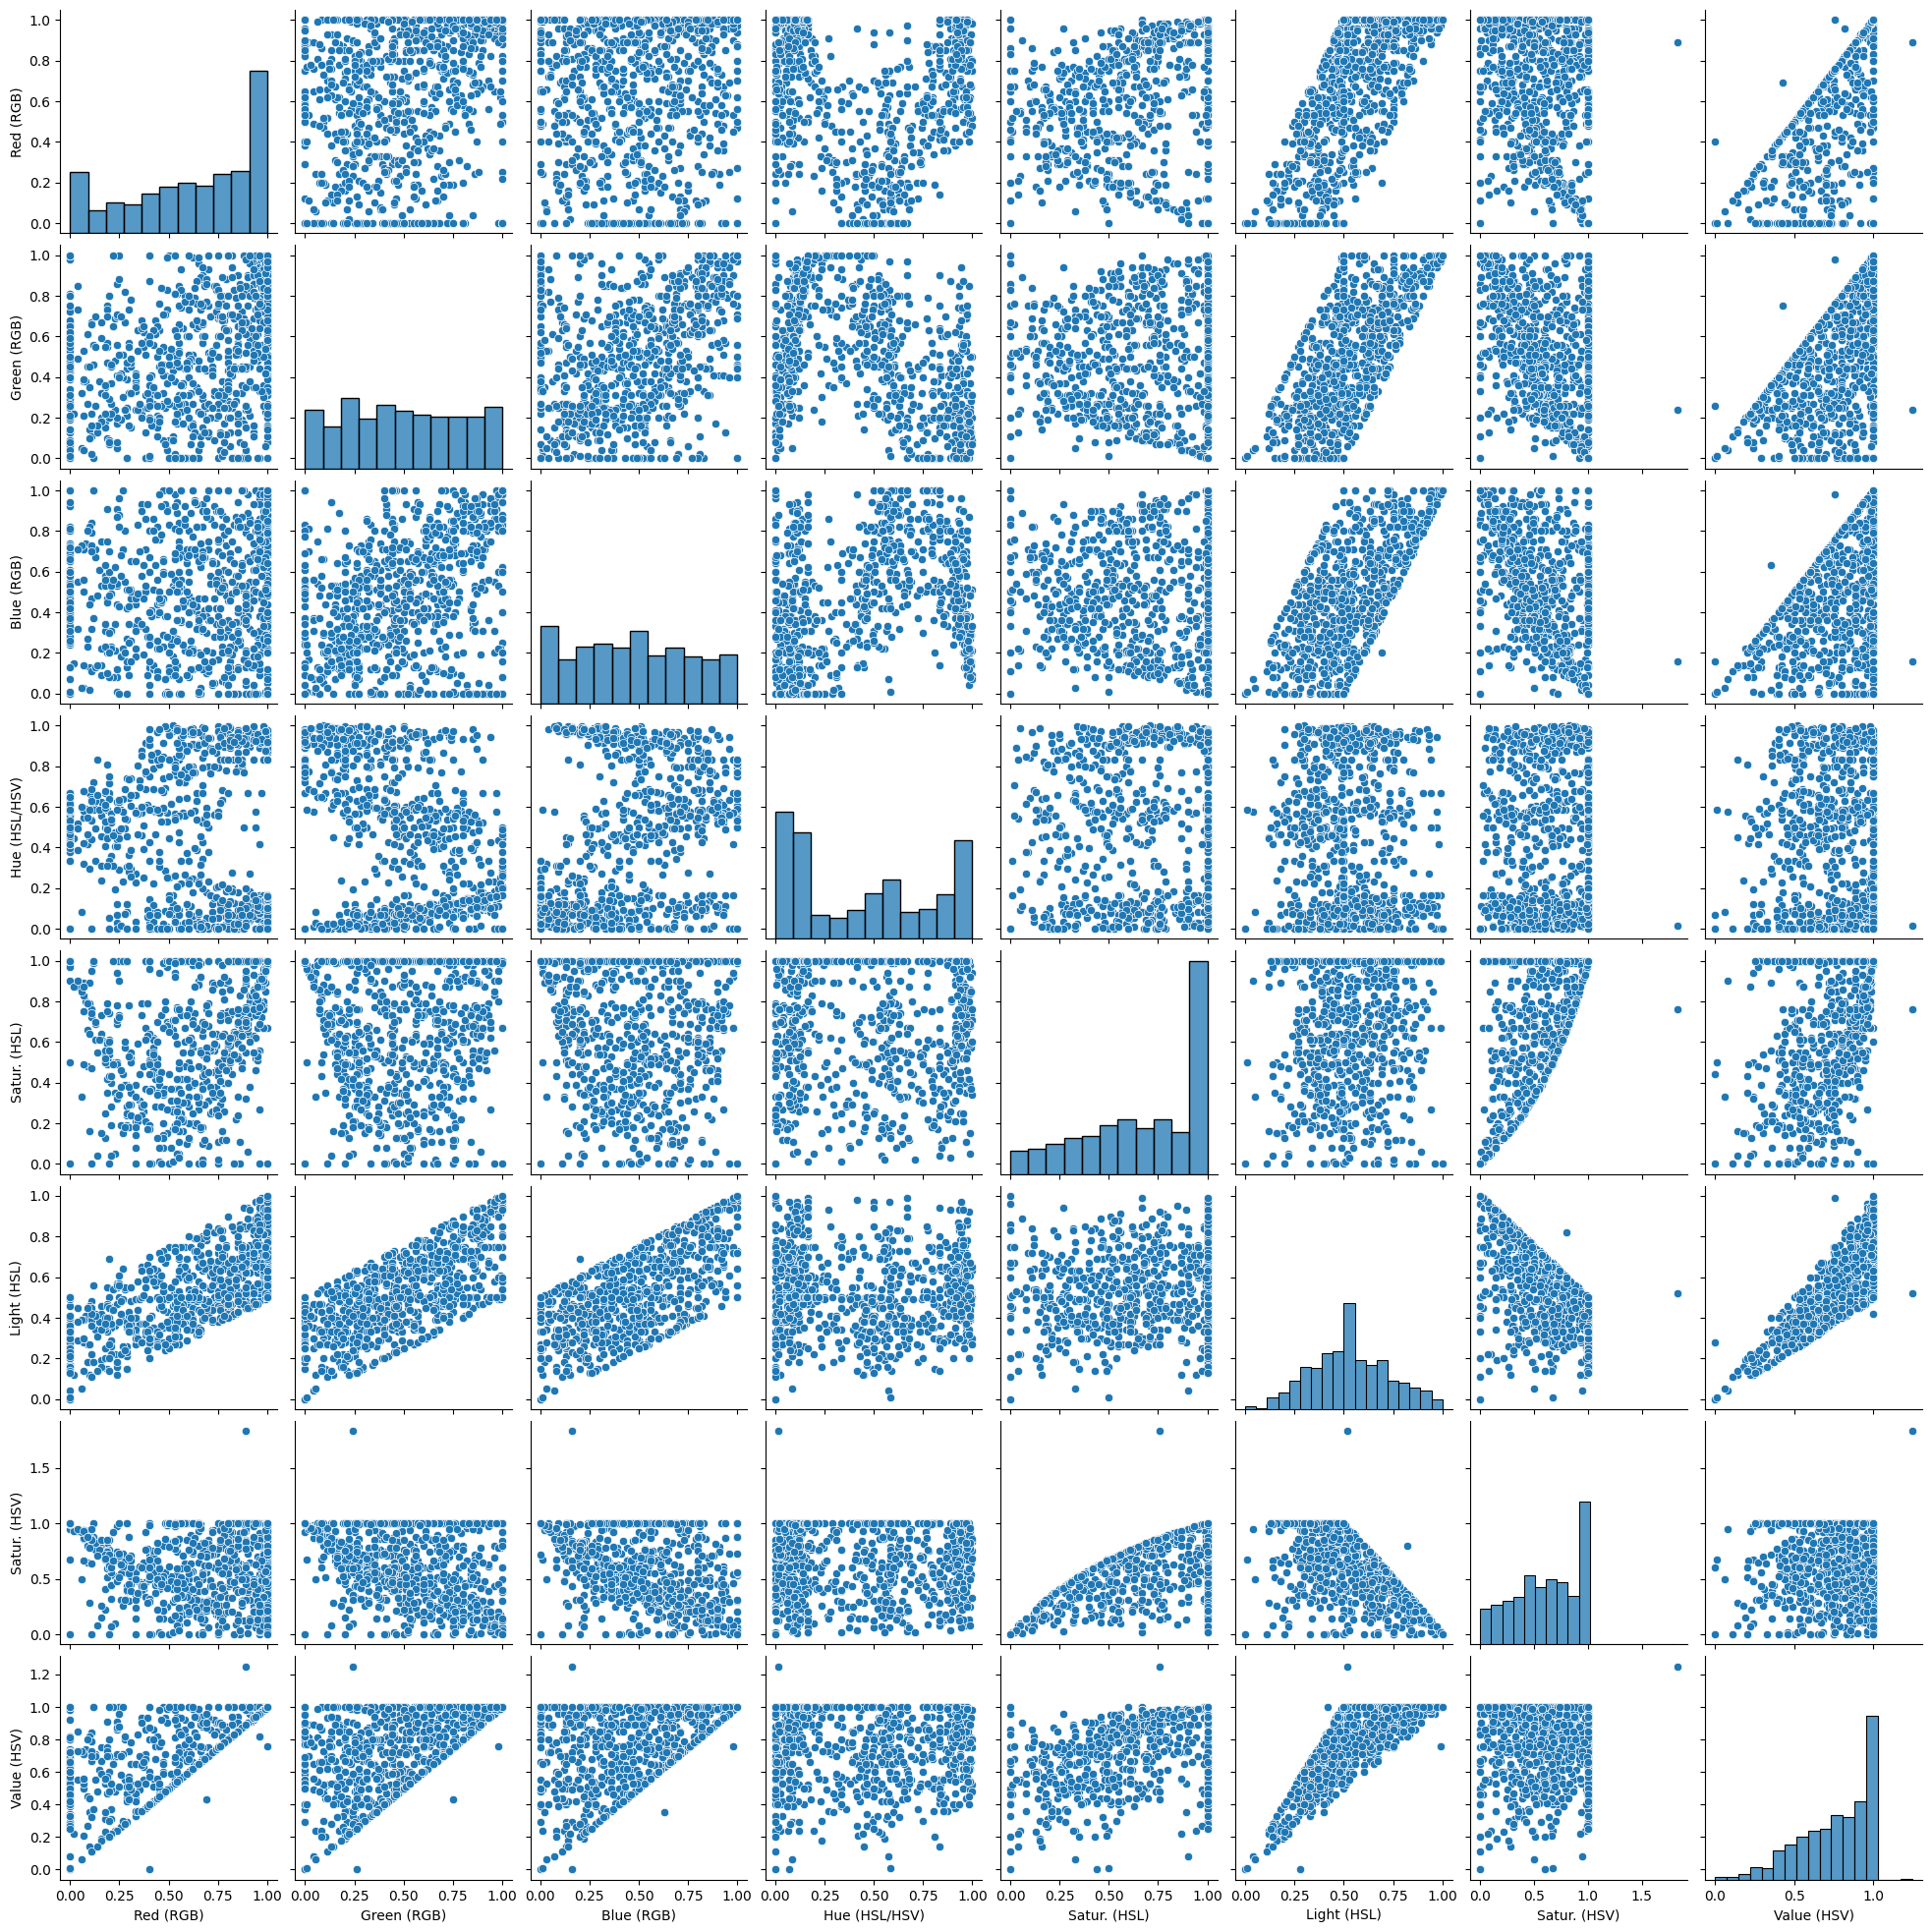

In [10]:
sns.pairplot(df_colors)

Colors are looked up by splitting the query color name by words, then looking for the first exact match with one of the words, but if there are none then it looks for any color with a name containing any of the query words.

For example, consider looking up colors with the word "brown" in their name. Notice that none of the colors are literally "brown" though they all have "brown" in the name.

In [11]:
df_colors.loc[df_colors.Name.str.contains("brown")]

,Name,Hex (RGB),Red (RGB),Green (RGB),Blue (RGB),Hue (HSL/HSV),Satur. (HSL),Light (HSL),Satur. (HSV),Value (HSV),Source
47,bistre brown,#967117,0.59,0.44,0.09,0.119444,0.73,0.34,0.85,0.59,ISCC-NBS
79,brown sugar,#AF6E4D,0.69,0.43,0.30,0.055556,0.39,0.49,0.56,0.69,Crayola
84,burnished brown,#A17A74,0.63,0.48,0.45,0.022222,0.19,0.54,0.28,0.63,Crayola
157,coyote brown,#81613C,0.51,0.38,0.24,0.088889,0.37,0.37,0.52,0.51,colorcode.is
168,dark brown,#654321,0.40,0.26,0.13,0.083333,0.51,0.26,0.67,0.40,X11/Web
209,drab dark brown,#4A412A,0.29,0.25,0.16,0.119444,0.28,0.23,0.43,0.29,Pantone
271,golden brown,#996515,0.60,0.40,0.08,0.100000,0.76,0.34,0.86,0.60,<NA>
596,pullman brown (ups brown),#644117,0.39,0.25,0.09,0.091667,0.63,0.24,0.77,0.39,<NA>
661,rosy brown,#BC8F8F,0.74,0.56,0.56,0.000000,0.25,0.65,0.24,0.74,<NA>
677,saddle brown,#8B4513,0.55,0.27,0.07,0.069444,0.76,0.31,0.86,0.55,<NA>


In [12]:
def colorInfo(color):
    color = color.lower()
    words = [color] if color.count(' ') == 0 else [color] + color.split(' ')
    for word in words:
        try:
            items = df_colors.loc[df_colors.Name == word]
            if len(items) > 0:
                return items
        except:
            continue
    
    for word in words:
        try:
            items = df_colors.loc[df_colors.Name.str.contains(word)]
            if len(items) > 0:
                return items
        except:
            continue
        
    return None

# def rgb(color):
#     info = colorInfo(color)
#     if info is None: return (None, None, None)
#     r = info['Red (RGB)'].values[0]
#     g = info['Green (RGB)'].values[0]
#     b = info['Blue (RGB)'].values[0]
#     return (r, g, b)

def rgbhsv(color):
    info = colorInfo(color)
    if info is None: return (None, None, None, None, None, None)
    r = info['Red (RGB)'].values[0]
    g = info['Green (RGB)'].values[0]
    b = info['Blue (RGB)'].values[0]
    h = info['Hue (HSL/HSV)'].values[0]
    s = info['Satur. (HSV)'].values[0]
    v = info['Value (HSV)'].values[0]
    return (r, g, b, h, s, v)

rgbhsv('brown')

(0.59, 0.44, 0.09, 0.11944444444444445, 0.85, 0.59)

In [13]:
def flatten(x):
    res = []
    for y in x:
        res.extend(y)
    return res

flatten([(1, 2), ('x', 'y')])

[1, 2, 'x', 'y']

In [14]:
df_out['Colors (count)'] = df_out.Color.str.count('/') + 1
df_out = df_out.assign(**{
    'Color 0': [colors[0] for colors in df_out.Color.str.split('/')],
    'Color 1': [colors[1] if len(colors) > 1 else None for colors in df_out.Color.str.split('/')]
}).convert_dtypes(infer_objects=True)
df_out.info()
df_out.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149511 entries, 0 to 149510
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         149511 non-null  string        
 1   Name              106260 non-null  string        
 2   DateTime          149511 non-null  datetime64[ns]
 3   MonthYear         149511 non-null  string        
 4   Date of Birth     149511 non-null  datetime64[ns]
 5   Outcome Type      149485 non-null  string        
 6   Outcome Subtype   68443 non-null   string        
 7   Animal Type       149511 non-null  string        
 8   Sex upon Outcome  149509 non-null  string        
 9   Age upon Outcome  149465 non-null  string        
 10  Breed             149511 non-null  string        
 11  Color             149511 non-null  string        
 12  Colors (count)    149511 non-null  Int64         
 13  Color 0           149511 non-null  string        
 14  Colo

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Colors (count),Color 0,Color 1
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,<NA>,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,2,Brown Tabby,White
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,<NA>,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,2,White,Brown
2,A821648,<NA>,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,<NA>,Other,Unknown,1 year,Raccoon,Gray,1,Gray,<NA>
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,<NA>,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,1,Buff,<NA>
4,A674754,<NA>,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,1,Orange Tabby,<NA>


This cell takes a few minutes to complete

In [16]:
# TODO 4 : Find some way to optimize this

color_vars = 'RGBHSV'

for color_index in ['0', '1']:
    colors = df_out[f'Color {color_index}']
    colors_isna = colors.isna()
    colors_RGBHSV = [rgbhsv(color) if not colors_isna[i] else (None, None, None, None, None, None) for i,color in enumerate(colors)]
    color_columns = []
    for color_var in color_vars:
        color_column = f'Color {color_index} {color_var}'
        color_columns.append(color_column)
        df_out = df_out.assign(**{
            color_column: pd.Series(np.zeros_like(df_out.index)).astype(dtype=float)
        })
    df_out[color_columns] = colors_RGBHSV

df_out

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,...,Color 0 B,Color 0 H,Color 0 S,Color 0 V,Color 1 R,Color 1 G,Color 1 B,Color 1 H,Color 1 S,Color 1 V
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,<NA>,Cat,Neutered Male,2 years,...,0.09,0.119444,0.85,0.59,1.00,1.00,1.00,0.000000,0.00,1.00
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,<NA>,Dog,Neutered Male,1 year,...,1.00,0.000000,0.00,1.00,0.59,0.44,0.09,0.119444,0.85,0.59
2,A821648,<NA>,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,<NA>,Other,Unknown,1 year,...,0.71,0.375000,0.06,0.75,NaN,NaN,NaN,NaN,NaN,NaN
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,<NA>,Dog,Neutered Male,4 months,...,0.50,0.091667,0.50,1.00,NaN,NaN,NaN,NaN,NaN,NaN
4,A674754,<NA>,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,...,0.00,0.083333,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149506,A859974,Lady Gaga,2022-08-16 11:42:00,Aug 2022,2012-06-21,Adoption,<NA>,Cat,Spayed Female,10 years,...,1.00,0.000000,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN
149507,A856973,Suede,2022-06-11 15:39:00,Jun 2022,2021-05-10,Adoption,<NA>,Cat,Spayed Female,1 year,...,1.00,0.666667,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN
149508,A852036,Queen,2022-03-17 17:22:00,Mar 2022,2021-12-08,Adoption,<NA>,Dog,Spayed Female,3 months,...,0.09,0.119444,0.85,0.59,0.00,0.00,0.00,0.000000,0.00,0.00
149509,A852775,A852775,2022-05-18 14:13:00,May 2022,2022-01-31,Adoption,Foster,Cat,Spayed Female,3 months,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Age

The "Age upon Outcome (years)" column is made here

In [ ]:
def age_years(age):
    try:
        [number_str, unit] = age.split(' ')
        number = float(number_str)
        if unit in ['years', 'year']:
            return number
        elif unit in ['months', 'month']:
            return number / 12
        elif unit in ['weeks', 'week']:
            return number / 52
        elif unit in ['days', 'day']:
            return number / 365
    except: pass
    return None

df_out['Age upon Outcome (years)'] = [age_years(age) for age in df_out['Age upon Outcome']]
df_out.head()

## Sex

Male or female are classified in two columns since some animals are of unknown sex

In [ ]:
# sex and neuter/spay columns

sex_male = df_out['Sex upon Outcome'].str.endswith(' Male')
sex_female = df_out['Sex upon Outcome'].str.endswith(' Female')
neutered_or_spayed = df_out['Sex upon Outcome'].str.startswith('Neutered') | df_out['Sex upon Outcome'].str.startswith('Spayed')

df_out['Male'] = sex_male
df_out['Female'] = sex_female
df_out['NeuteredOrSpayed'] = neutered_or_spayed
df_out = df_out.convert_dtypes(convert_boolean=True)
df_out.info()
df_out.head(10)

## Adopted?

In [ ]:
df_out['Adopted'] = df_out['Outcome Type'].str.find('Adopt') >= 0

In [ ]:
def bigCorr_bernoulli(df, independent, dependent):
    return (
        df[[independent, dependent]].groupby(independent).value_counts().div(
        df[[independent]].groupby(independent).value_counts())
    )[:,True]

## Preparing the breeds dataframe

In [ ]:
breeds_counts = df_out.Breed.value_counts()
df_breeds = pd.DataFrame(index=breeds_counts.index)
df_breeds = df_breeds.assign(Breed=breeds_counts.index, Count=breeds_counts)
df_breeds

In [ ]:
# Add animal type to the breed
breeds_types = df_out[['Breed', 'Animal Type']].groupby('Breed').value_counts().index
breeds = [breed_type[0] for breed_type in breeds_types]
types = [breed_type[1] for breed_type in breeds_types]
df_breeds_types = pd.DataFrame(data=types, index=breeds, columns=['Type'])
df_breeds_types = df_breeds_types.assign(Breed=breeds)
df_breeds_types = df_breeds_types.drop_duplicates('Breed')
df_breeds = df_breeds.assign(**{'Animal Type': df_breeds_types['Type']})
df_breeds = df_breeds.convert_dtypes(infer_objects=True)
df_breeds

In [ ]:
## Adoption likelihood

df_breeds = df_breeds.assign(Adopted=bigCorr_bernoulli(df_out, 'Breed', 'Adopted'))
df_breeds

In [ ]:
def means(df_groups, df_individual, independent, dependent):
    df_groups[f'{dependent} (mean)'] = df_individual[[independent, dependent]].groupby(independent).mean()
def stdDevs(df_groups, df_individual, independent, dependent):
    df_groups[f'{dependent} (std dev)'] = df_individual[[independent, dependent]].groupby(independent).std()
def stats(df_groups, df_individual, independent, dependent):
    means(df_groups, df_individual, independent, dependent)
    stdDevs(df_groups, df_individual, independent, dependent)

for color_index in ['0', '1']:
    for color_feature in color_vars:
        stats(df_breeds, df_out, 'Breed', f'Color {color_index} {color_feature}')

df_breeds.head()

In [ ]:
# sns.pairplot(data=df_breeds)

In [ ]:
df_breeds_info = pd.read_csv('dog breeds_enriched_20210503.csv').convert_dtypes(infer_objects=True)
df_breeds_info.info()
df_breeds_info.head()

In [ ]:
sns.pairplot(data=df_breeds_info)

In [ ]:
breeds_names_lower = df_breeds_info.Breed.str.lower()

def findBreedInfoName(breed):
    breed = breed.lower()
    
    info = df_breeds_info.Breed.loc[breeds_names_lower.str.contains(breed)]
    if len(info) > 0: return info.values[0]
    
    for word in breed.split(' '):
        info = df_breeds_info.Breed.loc[breeds_names_lower.str.contains(word)]
        if len(info) > 0: return info.values[0]
    
    return None

In [ ]:
df_out_with_breeds_info = df_out.assign(BreedsInfoName=[findBreedInfoName(breed) for breed in df_out.Breed])
df_out_with_breeds_info = df_out_with_breeds_info.merge(df_breeds_info, how='left', left_on='BreedsInfoName', right_on='Breed')
df_out_with_breeds_info.rename(columns={'Breed_x': 'Breed', 'Breed_y': 'Breed (catalog)'}, inplace=True)
df_out_with_breeds_info.info()
df_out_with_breeds_info.head()

In [ ]:
df_breeds_with_info = df_breeds.assign(BreedsInfoName=[findBreedInfoName(breed) for breed in df_breeds.Breed])
df_breeds_with_info = df_breeds_with_info.merge(df_breeds_info, how='left', left_on='BreedsInfoName', right_on='Breed')
df_breeds_with_info.rename(columns={'Breed_x': 'Breed', 'Breed_y': 'Breed (catalog)'}, inplace=True)
df_breeds_with_info.info()
df_breeds_with_info.head()

In [ ]:
df_out_with_breeds_info['Est. lifespan remaining'] = df_out_with_breeds_info['average lifespan'] - df_out_with_breeds_info['Age upon Outcome (years)']
df_out_with_breeds_info['Est. lifespan remaining'] = df_out_with_breeds_info['Est. lifespan remaining'].astype(dtype=float)
df_out_with_breeds_info.info()
df_out_with_breeds_info['Est. lifespan remaining']

In [ ]:
df_out.to_pickle('df_out.pkl')
df_breeds.to_pickle('df_breeds.pkl')
df_out_with_breeds_info.to_pickle('df_out_with_breeds_info.pkl')
df_breeds_with_info.to_pickle('df_breeds_with_info.pkl')

Data frames can now be quickly loaded for analysis

In [ ]:
df_out = pd.read_pickle('df_out.pkl')
df_breeds = pd.read_pickle('df_breeds.pkl')
df_out_with_breeds_info = pd.read_pickle('df_out_with_breeds_info.pkl')
df_breeds_with_info = pd.read_pickle('df_breeds_with_info.pkl')
df_out.info()
df_out.head()